# Report

In this project, I worked on the Cleveland heart disease dataset from UC Irvine Machine Learning Repository. The goal was to process the data and get some insights about the 303 patients who underwent clinical and non-invasive test for heart disease diagnosis.

The source publication is International application of a new probability algorithm for the diagnosis of coronary artery disease.
By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989
Published in American Journal of Cardiology

## 0. Reading the data

In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from src.load import load_data, describe_data

In [2]:
df=load_data('data/raw_data/processed.cleveland.data')

In [8]:
describe_data(df)

The number of (rows,columns) in this dataset is (303, 14).
 
Information about columns names and types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   rest_blood_pressure   303 non-null    float64
 4   serum_cholesterol     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   rest_ecg              303 non-null    float64
 7   max_heart_rate_thal   303 non-null    float64
 8   exercise_angina       303 non-null    float64
 9   st_oldpeak            303 non-null    float64
 10  st_slope              303 non-null    float64
 11  nb_major_vessels      299 non-null    float64
 12  thallium_stress_test  301 non-null    float64
 13  diagnosis             

In [9]:
# Display the first few rows of the dataset
df.head()

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# display 5 random rows
df.sample(5)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,diagnosis
50,41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0,0
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0
23,58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3


The data has been loaded, each row represents a patient and there are 14 attributes. Here's a summary of the dataset:

| Variable Name     | Role      | Type        | Description                                                                 | Units   | Missing Values |
|-------------------|-----------|-------------|---------------------------------------------------------------------------|---------|----------------|
| age               | Feature   | Float       |                                                                           | years   | no             |
| sex               | Feature   | Float       | 1 = male; 0 = female                                                      |         | no             |
| chest_pain          | Feature   | Float     | 1: typical angina,  2: atypical angina, 3: non-anginal pain, 4: asymptomatic|         | no             |
| rest_blood_pressure | Feature   | Float     |  resting blood pressure (on admission to the hospital)                  | mm Hg   | no             |
| serum_cholesterol   | Feature   | Float     |  serum cholestorol                                                      | mg/dl   | no             |
| fasting_blood_sugar | Feature   | Float     |  1 = true (value> 120 mg/dl); 0 = false                                  | mg/dl   | no             |
| rest_ecg             | Feature   | Float    | 0: normal, 1: ST-T wave abnormality, 2: probable or definite LV hypertrophy|         | no             |
| max_heart_rate_thal  | Feature   | Float    |  maximum heart rate achieved during thallium stress test                   |         | no             |
| exercise_angina      | Feature   | Float    | exercise induced angina, 1 = yes; 0 = no                                  |         | no             |
| st_oldpeak            | Feature   | Float   |  ST depression induced by exercise relative to rest                      |         | no             |
| st_slope              | Feature   | Float   | 1: upsloping,  2: flat, 3: downsloping                                   |         | no             |
| nb_major_vessels      | Feature   | Float   |   number of major vessels (0-3) colored by flourosopy                    |         | yes            |
| thallium_stress_test  | Feature   | Float   | 3 = normal; 6 = fixed defect; 7 = reversable defect                      |         | yes            |
| diagnosis             | Target    | Integer |   diagnosis of heart disease  0: absence. 1-4: presence                  |         | no             |

Note that the result of a thallium test stress may show:

-Normal perfusion study – normal blood supply to all areas of the heart muscle

-Reversible perfusion defect – decreased blood flow to an area of heart muscle, due to inadequate blood supply from a particular coronary artery (blood vessel around the heart)

-Fixed perfusion defect – decreased blood flow to an area of heart muscle, due to permanently damaged muscle (essentially a scar in the heart muscle)

## 1. Processing the data 

In [10]:
# Return number of rows and columns
shape_of_data = df.shape
print(f'The number of (rows,columns) in this dataset is {shape_of_data}.')

The number of (rows,columns) in this dataset is (303, 14).


### Which variables does our dataset have and what type?

In [11]:
# Return infos about the columns names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    float64
 1   sex                   303 non-null    float64
 2   chest_pain            303 non-null    float64
 3   rest_blood_pressure   303 non-null    float64
 4   serum_cholesterol     303 non-null    float64
 5   fasting_blood_sugar   303 non-null    float64
 6   rest_ecg              303 non-null    float64
 7   max_heart_rate_thal   303 non-null    float64
 8   exercise_angina       303 non-null    float64
 9   st_oldpeak            303 non-null    float64
 10  st_slope              303 non-null    float64
 11  nb_major_vessels      299 non-null    float64
 12  thallium_stress_test  301 non-null    float64
 13  diagnosis             303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


The dataset info shows that it contains numerical values, float or integer. However, from the description of the dataset, variables could be classified as categorical, boolean and numerical variables.

### Renaming category names for categorical variables and assigning correct type

In [3]:
from src.process import process_categorical_columns, process_boolean_columns

In [4]:
process_categorical_columns(df)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,diagnosis
0,63.0,male,typical angina,145.0,233.0,1.0,probable or definite LV hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,0.0,probable or definite LV hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67.0,male,asymptomatic,120.0,229.0,0.0,probable or definite LV hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37.0,male,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,0.0,probable or definite LV hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,0.0,normal,132.0,0.0,1.2,flat,0.0,reversable defect,1
299,68.0,male,asymptomatic,144.0,193.0,1.0,normal,141.0,0.0,3.4,flat,2.0,reversable defect,2
300,57.0,male,asymptomatic,130.0,131.0,0.0,normal,115.0,1.0,1.2,flat,1.0,reversable defect,3
301,57.0,female,atypical angina,130.0,236.0,0.0,probable or definite LV hypertrophy,174.0,0.0,0.0,flat,1.0,normal,1


The categories names of the categorical variables have been changed to make it more understandable. This will help for readability and understanding the data visualization later because the assignment of a number to the categories is difficult to understand, for example for 'thallium_stress_test', we have 3, 6 and 7 coding for 3 : 'normal', 6 : 'fixed defect', 7 : 'reversable defect'. For readibility and understanding purposes, for the variable 'sex' that can be considered as boolean were changed to 0: female, 1:male.

The correct data type for each variable has been replaced.


### Changing variables to boolean type

For the diagnosis, we have 0 which means absence of heart disease and 1,2,3 and 4 representing presence of heart disease. To simplify, we will changethe values from 1 to 4 to 1.

In [5]:
process_boolean_columns(df)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,high_fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,heart_disease_diagnosis
0,63.0,male,typical angina,145.0,233.0,True,probable or definite LV hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,False
1,67.0,male,asymptomatic,160.0,286.0,False,probable or definite LV hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,male,asymptomatic,120.0,229.0,False,probable or definite LV hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,True
3,37.0,male,non-anginal pain,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,False
4,41.0,female,atypical angina,130.0,204.0,False,probable or definite LV hypertrophy,172.0,False,1.4,upsloping,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversable defect,True
299,68.0,male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,True
300,57.0,male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,True
301,57.0,female,atypical angina,130.0,236.0,False,probable or definite LV hypertrophy,174.0,False,0.0,flat,1.0,normal,True


The variables 'fasting_blood_sugar', 'exercise_angina', 'diagnosis', have been changed to boolean True or False.

Column names were renamed, 'fasting_blood_sugar' to 'high_fasting_blood_sugar' (true when the value is > 120 mg/dl) and 'diagnosis' to 'heart_disease_diagnosis'.

In [6]:
# Finally let's check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       303 non-null    float64 
 1   sex                       303 non-null    object  
 2   chest_pain                303 non-null    category
 3   rest_blood_pressure       303 non-null    float64 
 4   serum_cholesterol         303 non-null    float64 
 5   high_fasting_blood_sugar  303 non-null    bool    
 6   rest_ecg                  303 non-null    category
 7   max_heart_rate_thal       303 non-null    float64 
 8   exercise_angina           303 non-null    bool    
 9   st_oldpeak                303 non-null    float64 
 10  st_slope                  303 non-null    category
 11  nb_major_vessels          299 non-null    float64 
 12  thallium_stress_test      301 non-null    category
 13  heart_disease_diagnosis   303 non-null    bool    

### Quick statistics summary of the numerical variables

In [7]:
# Look at the summary statistics of the dataset for numerical values
df.describe()

,age,rest_blood_pressure,serum_cholesterol,max_heart_rate_thal,st_oldpeak,nb_major_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


## 2. Plotting: Data exploration and visualization

### Is the dataset balanced between heart disease and healthy group?

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


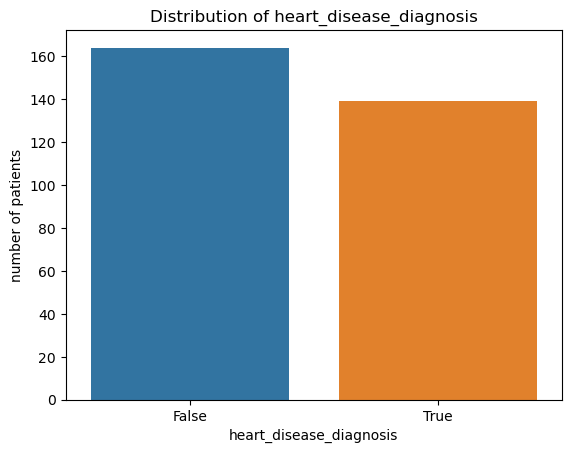

In [6]:
from src.plotting import make_count_plots

make_count_plots(df, ['heart_disease_diagnosis'])

The dataset seems to be balanced, with similar numbers of patients with heart disease (True in orange) and without heart disease (False in blue).

### What's the distribution of male/female in the whole dataset?

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


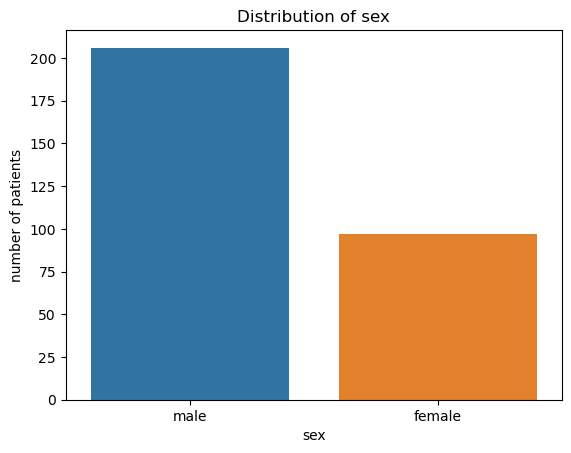

In [8]:
from src.plotting import make_count_plots

make_count_plots(df, ['sex'])


The dataset contains more males than females. Around 2/3 of the dataset is male. 

### What's the distribution of the numerical features between healthy and heart disease group ?

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

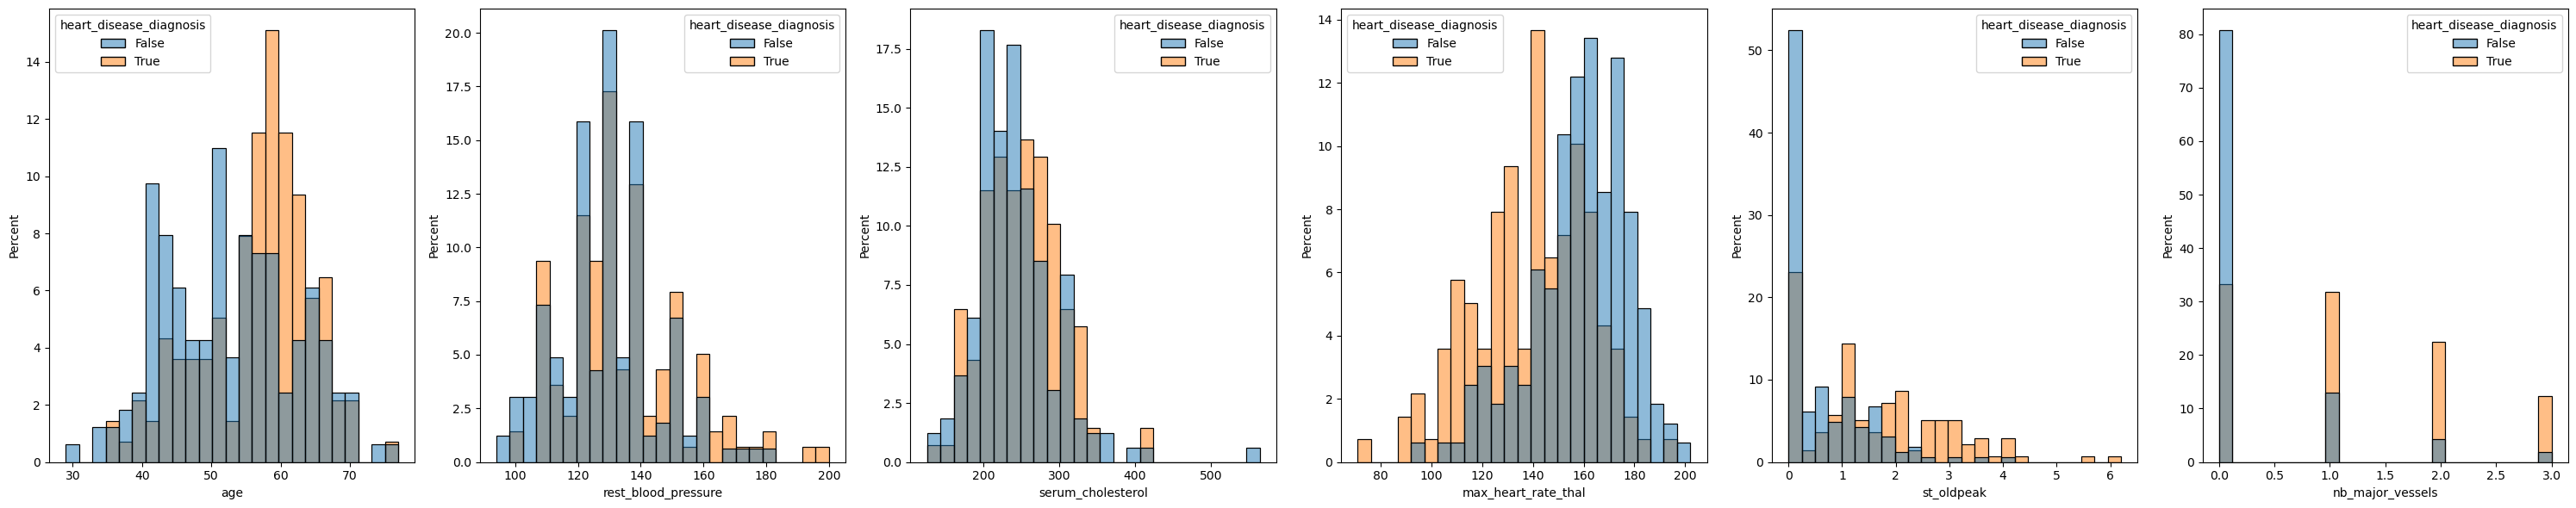

In [6]:
from src.plotting import hist_plot_numericals

hist_plot_numericals(df)

For visual comparison purposes, the histograms were generated using a normalizing parameter (stat = "percent").  

There are more patients with heart disease in the age randing from 55 to 65 years old. Moreover, patients from the heart disease group show lower values of maximum heart rate during the thallium stress test compared to the healthy group. Patients with heart disease seem to have a higher number of major vessels visible by fluoroscopy compared to the healthy group, indicating more

### What's the distribution of chest_pain in disease vs healthy group?

In [6]:
from src.plotting import plot_pie_chart

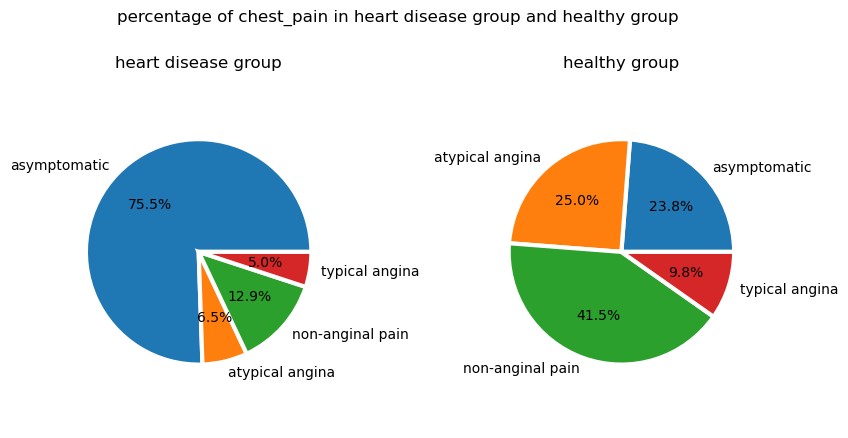

In [7]:
plot_pie_chart(df,'chest_pain')

In the heart disease group (left pie chart), we see that most of the patients have asymptomatic chest pain (75.5%) while in the healthy group, non-anginal pain seems to be dominating the chart (41.5%).

### What's the distribution of thallium_stress_test in disease vs healthy group?

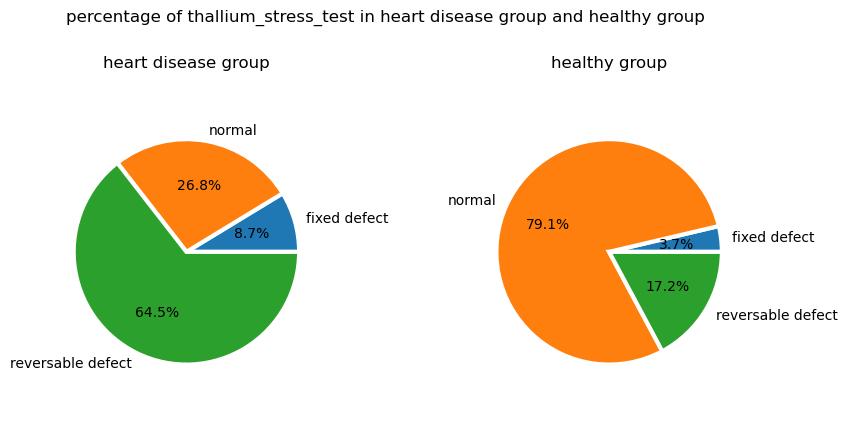

In [8]:
plot_pie_chart(df,'thallium_stress_test')

In the heart disease group, most patients have a reversible perfusion defect, which means decreased blood flow to an area of heart muscle, due to inadequate blood supply from a particular coronary artery (blood vessel around the heart).
On the contrary, in the healthy group, most patients have a normal blood flow.

### What's the relationship between the gender and 'heart_disease_diagnosis'?

In [29]:
from src.plotting import contingency_table

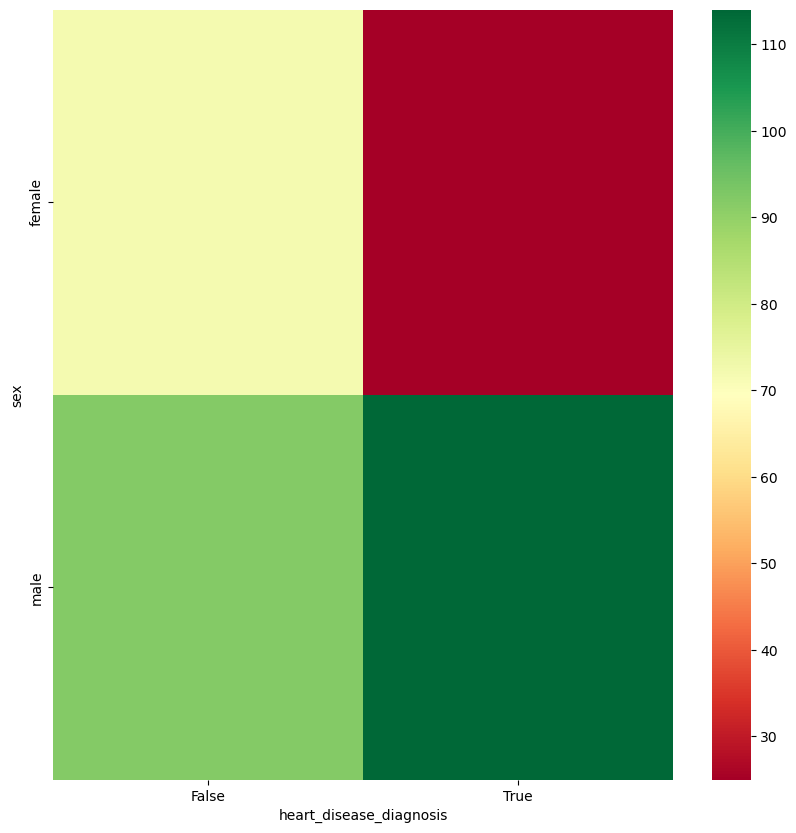

In [30]:
contingency_table(df, 'sex')

Here we can see that most patients with heart disease are males. 

### Are there correlations betwen the features? Which numerical features correlate the most with heart disease?

/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pauline/anaconda3/envs/data_science/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

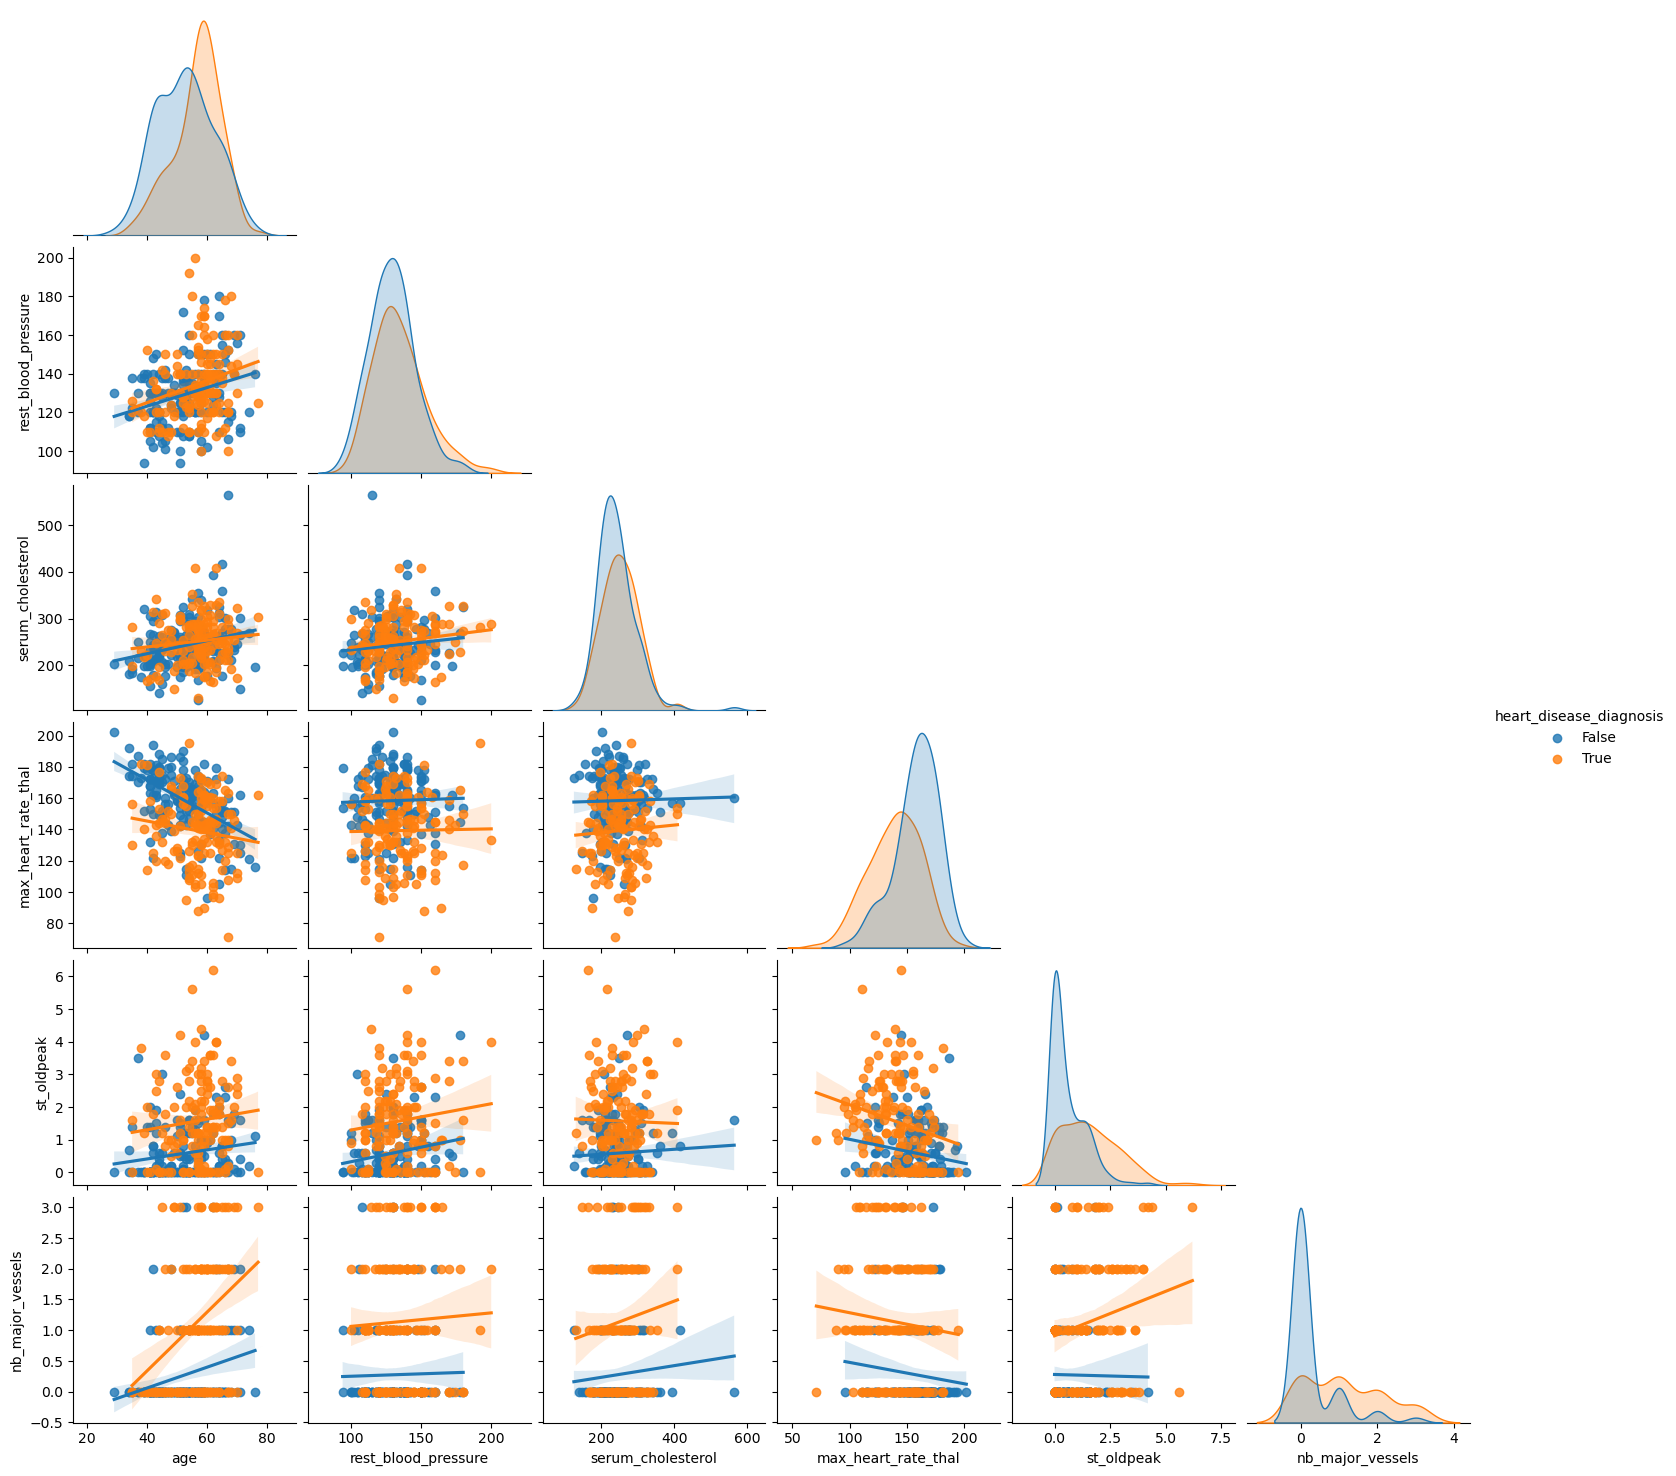

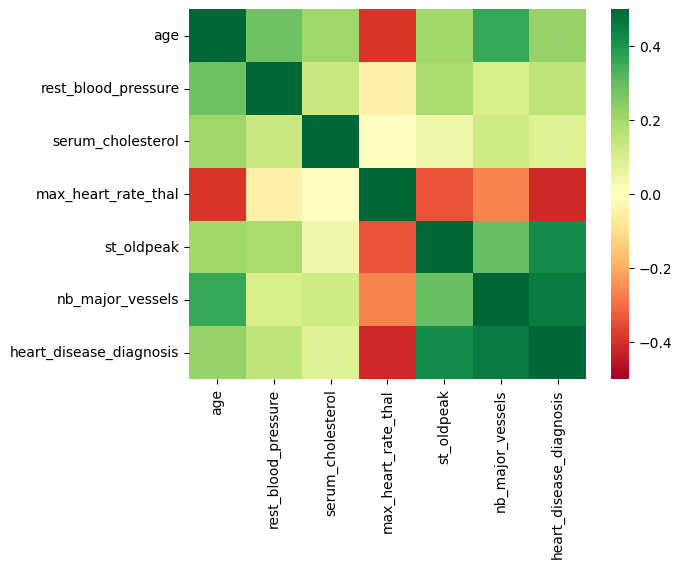

In [31]:
from src.plotting import look_for_correlations

look_for_correlations(df)

From the regression plot, we can observe that at a younger age (around 40), patients with heart disease have a lower max heart rate at the thallium stress test but later in life, after 60 years old, the difference is reducing and both groups perform similarly.
With age, the number of major vessels visible by fluoroscopy increases and more rapidly in the heart disease group. 

Moreover the st_old peak, the ST depression induced by exercise relative to rest, increases with the number of major vessels damaged in the heart disease group.  

In the heatmap, heart disease seems to negatively correlate with the maximum heart rate and seem to positively correlate with the nb of major vessels visible by fluoroscopy.

 

In [65]:
num_df.corr()

,age,rest_blood_pressure,serum_cholesterol,max_heart_rate_thal,st_oldpeak,nb_major_vessels,heart_disease_diagnosis
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.362605,0.223120
rest_blood_pressure,0.284946,1.000000,0.130120,-0.045351,0.189171,0.098773,0.150825
serum_cholesterol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.119000,0.085164
max_heart_rate_thal,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.264246,-0.417167
st_oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.295832,0.424510
nb_major_vessels,0.362605,0.098773,0.119000,-0.264246,0.295832,1.000000,0.460442
heart_disease_diagnosis,0.223120,0.150825,0.085164,-0.417167,0.424510,0.460442,1.000000


In [74]:
corr_matrix = num_df.corr()
corr_matrix['heart_disease_diagnosis'].sort_values(ascending = False)

heart_disease_diagnosis    1.000000
nb_major_vessels           0.460442
st_oldpeak                 0.424510
age                        0.223120
rest_blood_pressure        0.150825
serum_cholesterol          0.085164
max_heart_rate_thal       -0.417167
Name: heart_disease_diagnosis, dtype: float64

## Train Test Split Data

In [ ]:
# Drop the target 'heart_disease_diagnosis', we call X the features and y the target column
X = df.drop('heart_disease_diagnosis', axis = 1)
y = df['heart_disease_diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, test_size=0.2, random_state= ??, stratified = X['sex'])


In [ ]:
for train_index, test_index in split_df.split(df,)

## Data cleaning

In [11]:
# Check missing values
df.isna().sum()

age                         0
sex                         0
chest_pain                  0
rest_blood_pressure         0
serum_cholesterol           0
high_fasting_blood_sugar    0
rest_ecg                    0
max_heart_rate_thal         0
exercise_angina             0
st_oldpeak                  0
st_slope                    0
nb_major_vessels            4
thallium_stress_test        2
heart_disease_diagnosis     0
dtype: int64

In [13]:
# print the total number of missing values
df.isnull().values.sum()

6

4 values are missing in the column 'nb_major_vessels' and 2 values are missing in the column 'thallium_stress_test'.



In [28]:
df.columns[df.isnull().any()]

Index(['nb_major_vessels', 'thallium_stress_test'], dtype='object')

In [41]:
nan_columns = df.columns[df.isnull().any()]

print(df[nan_columns].dtypes)

nb_major_vessels         float64
thallium_stress_test    category
dtype: object


In [10]:
# do I check for duplicates? 
duplicated_count = df.duplicated().sum()
print(duplicated_count)

0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# create an imputer with the strategy 'most_frequent' for the categorical variables 'thallium_stress_test', 'nb_major_vessels' is numerical but only accept values from 0 to 3
my_imputer = SimpleImputer(strategy = 'most_frequent')

# fit the imputer instance to the training data set
my_imputer.fit()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# define a function to handle NaNs and impute strategy
def impute_nan(df, column, strategy):
    # check if there are null values
    number_of_nan = df.isnull().values.sum()
    if number_of_nan !=0:
        nan_columns = df.columns[df.isnull().any()]
        # check type of the column where there are NaNs and impute strategy
        for column, type in df[nan_columns].dtypes:
            features_numeric = []
            features_categoric = []
            
            if type == 'float64':
                features_numeric.append(column)
                my_numerical_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),]
            if type == 'category':
                features_categoric.append(column)
                my_categorical_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),] 
            
            transform_columns = ColumnTransformer(transformers=[('imputer_numeric',
                                                imputer_numeric,
                                                features_numeric),
                                               ('imputer_categoric',
                                                imputer_categoric,
                                                features_categoric)])
        transform_columns.fit(X_train)
        X_train = preprocessor.transform(X_train)
        X_test = preprocessor.transform(X_test)

### Handling text and categorical attributes

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encooder = OneHotEncoder()